('train accuracy: ', 0.8782782449421364, ' test accuracy: ', 0.8697968697968698, ' max depth: ', 4)
('intel accuracy: ', 0.8299592245511124)
('sim accuracy: ', 0.8765818569335287)
('precision: ', array([0.98, 0.  , 0.92, 0.87, 0.53]))
('recall: ', array([0.92, 0.  , 0.86, 0.98, 0.86]))
('Fscore: ', array([0.95, 0.  , 0.89, 0.92, 0.66]))
('support', array([ 727,  256,  160, 1700,  160], dtype=int64))
Confusion matrix, without normalization
[[ 667    0   12    0   48]
 [   0    0    0  224   32]
 [   3    0  138    8   11]
 [   0    0    0 1669   31]
 [   9    0    0   13  138]]
Normalized confusion matrix
[[0.92 0.   0.02 0.   0.07]
 [0.   0.   0.   0.88 0.12]
 [0.02 0.   0.86 0.05 0.07]
 [0.   0.   0.   0.98 0.02]
 [0.06 0.   0.   0.08 0.86]]


C:\Users\msarkar\AppData\Local\conda\conda\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


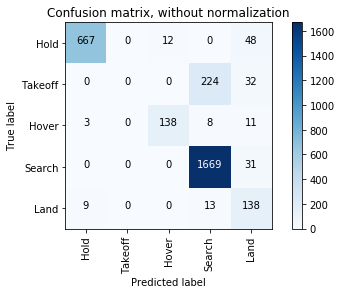

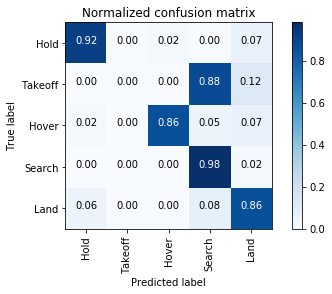

In [8]:
from sklearn import tree  
from sklearn.externals import joblib
import pydotplus
from sklearn.datasets import load_iris
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import itertools
#import graphviz 


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


own_data = True
data_feature_names = [ 'altitude', 'vel_x', 'vel_y', 'vel_z' ]
data_class_name_num = [1, 2, 3, 4, 5]
data_class_name = ['Hold', 'Takeoff', 'Hover', 'Search', 'Land']

data_feature_names_gtri = [ 'roll', 'pitch', 'yaw', 'rollspeed','pitchspeed','yawspeed', 'xacc', 'yacc', 'zacc']
data_class_name_num_gtri = [0, 1, 2, 3]
data_class_name_gtri = ['Hold', 'Fly Orbit and Observe', 'Fly Search Pattern', 'Survey Target']


datagtri = pd.read_csv('GTRIdataset.csv')
datagtri = datagtri.dropna()
gtriX = datagtri.iloc[:,1:10]
gtriX = gtriX.reset_index(drop=True)
gtriX = gtriX.dropna()
gtriY = datagtri.iloc[:,10]
gtriY = gtriY.replace(data_class_name_num_gtri, data_class_name_gtri)
gtriY = gtriY.reset_index(drop=True)
gtriY = gtriY.dropna()

dataintel = pd.read_csv('intelDroneData.csv')
dataintel = dataintel.dropna()
intelX = dataintel.iloc[:,0:4]
intelX = intelX.reset_index(drop=True)
intelX = intelX.dropna()
intelY = dataintel.iloc[:,-1]
intelY = intelY.replace(data_class_name_num, data_class_name)
intelY = intelY.reset_index(drop=True)
intelY = intelY.dropna()

datasim = pd.read_csv('gazeboSimulationData.csv')
datasim = datasim.reset_index(drop=True)
datasim = datasim.dropna()
simX = datasim.iloc[:,0:4]
simX = simX.reset_index(drop=True)
simX = simX.dropna()
simY = datasim.iloc[:,-1]
simY = simY.replace(data_class_name_num, data_class_name)
simY = simY.reset_index(drop=True)
simY = simY.dropna()

# # to test gtri data
# own_data = False
# dataX = gtriX
# dataY = gtriY
# data_feature_names = data_feature_names_gtri
# data_class_name = data_class_name_gtri

# # to test intel drone data
# dataX = intelX
# dataY = intelY

# to test simulation data
dataX = simX
dataY = simY

indx = [i for i in range(len(dataY))]
random.shuffle(indx)
dataPartision = 0.8
totaltrainsample = int(dataPartision*len(dataY))

trainX = dataX.iloc[indx[0:totaltrainsample],:]
trainX = trainX.reset_index(drop=True)
trainX = trainX.dropna()
trainY = dataY.iloc[indx[0:totaltrainsample]]
trainY = trainY.reset_index(drop=True)
trainY = trainY.dropna()

testX = dataX.iloc[indx[totaltrainsample:],:]
testX = testX.reset_index(drop=True)
testX = testX.dropna()
testY = dataY.iloc[indx[totaltrainsample:]]
testY = testY.reset_index(drop=True)
testY = testY.dropna()

clf = tree.DecisionTreeClassifier(criterion='entropy',#'gini', 
                                  splitter='best', 
                                  max_depth=4,#default None 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, 
                                  max_features=None, 
                                  random_state=None, 
                                  max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, 
                                  min_impurity_split=None, 
                                  class_weight=None, 
                                  presort=False)                                             

 
clf = clf.fit(trainX, trainY) 
# # save the model for future use
# joblib.dump(clf, 'trainedModel.pkl', protocol=2)
# # clf = joblib.load('trainedModel.pkl') 
 
trainAccuracy = clf.score(trainX, trainY)
testAccuracy = clf.score(testX, testY)
maxDepth = clf.max_depth

print('train accuracy: ', trainAccuracy, ' test accuracy: ', testAccuracy, ' max depth: ', maxDepth)

if own_data:
    intelAccuracy = clf.score(intelX, intelY)
    print('intel accuracy: ', intelAccuracy)

    simAccuracy = clf.score(simX, simY)
    print('sim accuracy: ', simAccuracy)

testY_pred = clf.predict(testX)
y_true = testY
y_pred = testY_pred
precision,recall,fbeta_score,support = precision_recall_fscore_support(y_true, 
                                                                       y_pred, 
                                                                       beta=1.0, 
                                                                       labels=None, 
                                                                       pos_label=1, 
                                                                       average=None, 
                                                                       warn_for=('precision', 'recall', 'f-score'), 
                                                                       sample_weight=None)
print('precision: ', precision)
print('recall: ', recall)
print('Fscore: ', fbeta_score)
print('support', support)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data_class_name,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data_class_name, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [9]:
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                class_names=data_class_name,
                                out_file=None,
                                max_depth=None,
                                leaves_parallel=False,
                                filled=True,
                                rounded=True,
                                special_characters=True) 
                         
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

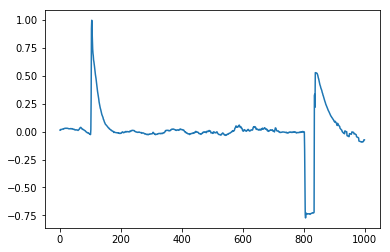

In [63]:
plt.plot(dataX.iloc[1:1000,3])

In [55]:
print(len(intelY), intelX.shape)

13979 (13979, 4)


In [10]:
print(totaltrainsample)

12011


In [6]:
datasamples = np.array([7901,1392,488,1000,402])
print(datasamples/sum(datasamples))

[0.70651882 0.12447465 0.04363766 0.08942144 0.03594742]
